<a href="https://colab.research.google.com/github/shun0109/colab/blob/main/lecture_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("caret")
install.packages("glmnet")
library(tidyverse)
library(caret)
library(glmnet)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
df=read.csv('preowned_residence.csv')
df

種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅.名称,最寄駅.距離.分.,取引価格.総額.,間取り,面積...,建築年,建物の構造,都市計画,取引時期,改装,取引年,取引四半期,戦前flg
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,4.5e+06,３ＤＫ,55,1971,ＲＣ,２種住居,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,4.5e+06,３ＤＫ,55,1971,ＲＣ,２種住居,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,6,4.6e+06,３ＤＫ,55,1980,ＲＣ,１種住居,2021年第2四半期,未改装,2021,2,0
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,5.1e+06,２ＬＤＫ,55,1971,ＲＣ,２種住居,2021年第4四半期,未改装,2021,4,0
中古マンション等,11101,埼玉県,さいたま市西区,大字宝来,指扇,9,4.3e+06,３ＬＤＫ,75,1975,ＲＣ,１種住居,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,大字宝来,指扇,10,7.6e+06,４ＤＫ,75,1976,ＲＣ,１種住居,2021年第3四半期,未改装,2021,3,0
中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,6,3.6e+07,３ＬＤＫ,75,2018,ＲＣ,２中住専,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,10,3.6e+07,３ＬＤＫ,70,2019,ＲＣ,２中住専,2021年第3四半期,未改装,2021,3,0
中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,10,3.6e+07,３ＬＤＫ,75,2019,ＲＣ,２中住専,2021年第3四半期,未改装,2021,3,0


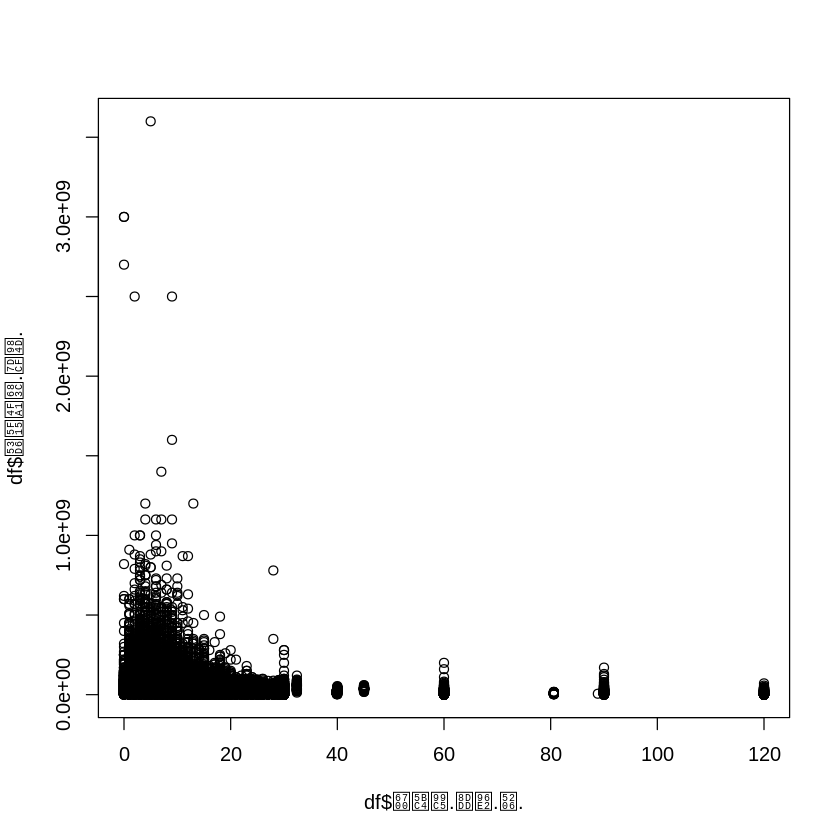

In [ ]:
plot(df$最寄駅.距離.分.,df$取引価格.総額.)

In [ ]:
str(df)

'data.frame':	506090 obs. of  18 variables:
 $ 種類           : chr  "中古マンション等" "中古マンション等" "中古マンション等" "中古マンション等" ...
 $ 市区町村コード : int  11101 11101 11101 11101 11101 11101 11101 11101 11101 11101 ...
 $ 都道府県名     : chr  "埼玉県" "埼玉県" "埼玉県" "埼玉県" ...
 $ 市区町村名     : chr  "さいたま市西区" "さいたま市西区" "さいたま市西区" "さいたま市西区" ...
 $ 地区名         : chr  "大字西遊馬" "大字西遊馬" "大字西遊馬" "大字西遊馬" ...
 $ 最寄駅.名称    : chr  "指扇" "指扇" "指扇" "指扇" ...
 $ 最寄駅.距離.分.: num  5 5 6 5 9 10 6 10 10 10 ...
 $ 取引価格.総額. : num  4.5e+06 4.5e+06 4.6e+06 5.1e+06 4.3e+06 7.6e+06 3.6e+07 3.6e+07 3.6e+07 3.5e+07 ...
 $ 間取り         : chr  "３ＤＫ" "３ＤＫ" "３ＤＫ" "２ＬＤＫ" ...
 $ 面積...        : num  55 55 55 55 75 75 75 70 75 70 ...
 $ 建築年         : num  1971 1971 1980 1971 1975 ...
 $ 建物の構造     : chr  "ＲＣ" "ＲＣ" "ＲＣ" "ＲＣ" ...
 $ 都市計画       : chr  "２種住居" "２種住居" "１種住居" "２種住居" ...
 $ 取引時期       : chr  "2021年第1四半期" "2021年第1四半期" "2021年第2四半期" "2021年第4四半期" ...
 $ 改装           : chr  "未改装" "未改装" "未改装" "未改装" ...
 $ 取引年         : num  2021 2021 2021 2021 2021 ...
 $ 取

In [ ]:
# カテゴリカルをfactorに変換
categorical_vars <- c("都道府県名", "市区町村名",
                      "間取り", "建物の構造",
                      "都市計画", "取引時期", "改装")
df[categorical_vars] <- lapply(df[categorical_vars], factor)
df <- df %>%
  mutate(戦前flg=as.factor(戦前flg))
df

種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅.名称,最寄駅.距離.分.,取引価格.総額.,間取り,面積...,建築年,建物の構造,都市計画,取引時期,改装,取引年,取引四半期,戦前flg
<chr>,<int>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,4.5e+06,３ＤＫ,55,1971,ＲＣ,２種住居,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,4.5e+06,３ＤＫ,55,1971,ＲＣ,２種住居,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,6,4.6e+06,３ＤＫ,55,1980,ＲＣ,１種住居,2021年第2四半期,未改装,2021,2,0
中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,5.1e+06,２ＬＤＫ,55,1971,ＲＣ,２種住居,2021年第4四半期,未改装,2021,4,0
中古マンション等,11101,埼玉県,さいたま市西区,大字宝来,指扇,9,4.3e+06,３ＬＤＫ,75,1975,ＲＣ,１種住居,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,大字宝来,指扇,10,7.6e+06,４ＤＫ,75,1976,ＲＣ,１種住居,2021年第3四半期,未改装,2021,3,0
中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,6,3.6e+07,３ＬＤＫ,75,2018,ＲＣ,２中住専,2021年第1四半期,未改装,2021,1,0
中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,10,3.6e+07,３ＬＤＫ,70,2019,ＲＣ,２中住専,2021年第3四半期,未改装,2021,3,0
中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,10,3.6e+07,３ＬＤＫ,75,2019,ＲＣ,２中住専,2021年第3四半期,未改装,2021,3,0


In [ ]:
df %>%
   select(-c(種類,市区町村コード,市区町村名,地区名,取引価格.総額.,最寄駅.名称,取引時期))

都道府県名,最寄駅.距離.分.,間取り,面積...,建築年,建物の構造,都市計画,改装,取引年,取引四半期,戦前flg
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
埼玉県,5,３ＤＫ,55,1971,ＲＣ,２種住居,未改装,2021,1,0
埼玉県,5,３ＤＫ,55,1971,ＲＣ,２種住居,未改装,2021,1,0
埼玉県,6,３ＤＫ,55,1980,ＲＣ,１種住居,未改装,2021,2,0
埼玉県,5,２ＬＤＫ,55,1971,ＲＣ,２種住居,未改装,2021,4,0
埼玉県,9,３ＬＤＫ,75,1975,ＲＣ,１種住居,未改装,2021,1,0
埼玉県,10,４ＤＫ,75,1976,ＲＣ,１種住居,未改装,2021,3,0
埼玉県,6,３ＬＤＫ,75,2018,ＲＣ,２中住専,未改装,2021,1,0
埼玉県,10,３ＬＤＫ,70,2019,ＲＣ,２中住専,未改装,2021,3,0
埼玉県,10,３ＬＤＫ,75,2019,ＲＣ,２中住専,未改装,2021,3,0


In [ ]:
na.omit(df)

,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅.名称,最寄駅.距離.分.,取引価格.総額.,間取り,面積...,建築年,建物の構造,都市計画,取引時期,改装,取引年,取引四半期,戦前flg
,<chr>,<int>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,4.5e+06,３ＤＫ,55,1971,ＲＣ,２種住居,2021年第1四半期,未改装,2021,1,0
2,中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,4.5e+06,３ＤＫ,55,1971,ＲＣ,２種住居,2021年第1四半期,未改装,2021,1,0
3,中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,6,4.6e+06,３ＤＫ,55,1980,ＲＣ,１種住居,2021年第2四半期,未改装,2021,2,0
4,中古マンション等,11101,埼玉県,さいたま市西区,大字西遊馬,指扇,5,5.1e+06,２ＬＤＫ,55,1971,ＲＣ,２種住居,2021年第4四半期,未改装,2021,4,0
5,中古マンション等,11101,埼玉県,さいたま市西区,大字宝来,指扇,9,4.3e+06,３ＬＤＫ,75,1975,ＲＣ,１種住居,2021年第1四半期,未改装,2021,1,0
6,中古マンション等,11101,埼玉県,さいたま市西区,大字宝来,指扇,10,7.6e+06,４ＤＫ,75,1976,ＲＣ,１種住居,2021年第3四半期,未改装,2021,3,0
7,中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,6,3.6e+07,３ＬＤＫ,75,2018,ＲＣ,２中住専,2021年第1四半期,未改装,2021,1,0
8,中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,10,3.6e+07,３ＬＤＫ,70,2019,ＲＣ,２中住専,2021年第3四半期,未改装,2021,3,0
9,中古マンション等,11101,埼玉県,さいたま市西区,西大宮,西大宮,10,3.6e+07,３ＬＤＫ,75,2019,ＲＣ,２中住専,2021年第3四半期,未改装,2021,3,0


In [ ]:
# 目的変数と説明変数
y <- df$取引価格.総額.
x <- df %>% select(-c(種類,市区町村コード,市区町村名,地区名,取引価格.総額.,最寄駅.名称,取引時期))

In [ ]:
# ダミー変数化
dummies <- dummyVars(~ ., data = x,fullRank = TRUE)
x_trans <- predict(dummies, newdata = x)

# 学習用とテスト用に分割
set.seed(123)
trainIndex <- createDataPartition(y, p = 0.7, list = FALSE)
x_train <- x_trans[trainIndex,]
y_train <- y[trainIndex]
x_test  <- x_trans[-trainIndex,]
y_test  <- y[-trainIndex]

In [ ]:
head(x_train)

,都道府県名.京都府,都道府県名.佐賀県,都道府県名.兵庫県,都道府県名.北海道,都道府県名.千葉県,都道府県名.和歌山県,都道府県名.埼玉県,都道府県名.大分県,都道府県名.大阪府,都道府県名.奈良県,⋯,都市計画.準住居,都市計画.準工業,都市計画.調整区域,都市計画.近隣商業,都市計画.都計外,都市計画.非線引き,改装.未改装,取引年,取引四半期,戦前flg.1
1,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,2021,1,0
5,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,2021,1,0
7,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,2021,1,0
8,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,2021,3,0
9,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,2021,3,0
10,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,2021,3,0


In [ ]:
lm_model <- train(x = x_train, y = y_train,
                  method = "lm")

pred_lm <- predict(lm_model, x_test)
postResample(pred_lm, y_test)

Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-esti

RMSE     Rsquared          MAE 
2.448281e+07 4.834781e-01 1.172446e+07

In [ ]:
summary(lm_model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.277e+09 -9.730e+06 -1.746e+06  6.446e+06  3.503e+09 

Coefficients: (6 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -5.059e+09  5.666e+07 -89.299  < 2e-16 ***
都道府県名.京都府                  1.949e+07  8.500e+05  22.933  < 2e-16 ***
都道府県名.佐賀県                 -1.190e+06  1.572e+06  -0.757 0.448941    
都道府県名.兵庫県                  1.340e+07  8.289e+05  16.166  < 2e-16 ***
都道府県名.北海道                  6.733e+06  8.403e+05   8.013 1.13e-15 ***
都道府県名.千葉県                  1.454e+07  8.303e+05  17.517  < 2e-16 ***
都道府県名.和歌山県                1.150e+06  1.369e+06   0.840 0.400722    
都道府県名.埼玉県                  1.648e+07  8.290e+05  19.876  < 2e-16 ***
都道府県名.大分県                  5.398e+06  1.093e+06   4.938 7.89e-07 ***
都道府県名.大阪府                  1.662e+07  8.208e+05  20.251  < 2e-16 ***


In [ ]:
# # 欠損値処理（例: 欠損を除去）
# df <- na.omit(df)

# # 目的変数と説明変数
# y <- df$取引価格（総額）
# x <- df %>% select(-c(取引価格.総額.,))

# # ダミー変数化
# dummies <- dummyVars(~ ., data = x)
# x_trans <- predict(dummies, newdata = x)

# # 学習用とテスト用に分割
# set.seed(123)
# trainIndex <- createDataPartition(y, p = 0.7, list = FALSE)
# x_train <- x_trans[trainIndex,]
# y_train <- y[trainIndex]
# x_test  <- x_trans[-trainIndex,]
# y_test  <- y[-trainIndex]

In [ ]:
# データ前処理: 中心化と標準化
preProc <- preProcess(x_train, method = c("center", "scale"))

x_train_scaled <- predict(preProc, x_train)
x_test_scaled  <- predict(preProc, x_test)

# Ridge回帰（標準化後のデータを使用）
ridge_model <- train(x = x_train_scaled, y = y_train,
                     method = "glmnet",
                     tuneLength = 10,
                     preProcess = NULL)  # ここでは既に標準化済みなのでNULL

Warning message in preProcess.default(x_train, method = c("center", "scale")):
“These variables have zero variances: 間取り.２ＤＫ＋Ｋ, 間取り.２Ｌ＋Ｓ, 間取り.３ＬＤ＋Ｓ, 間取り.４Ｋ＋Ｓ, 間取り.６ＤＫ＋Ｓ, 建物の構造.ＲＣ、木造”


In [ ]:
summary(ridge_model)

In [ ]:
pred_ridge <- predict(ridge_model, x_test)
postResample(pred_ridge, y_test)